In [1]:
import pandas as pd
import numpy as np
import sys
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_context("notebook")
sns.set_style("darkgrid")
plt.rcParams['text.usetex'] = True

# Importar datos

Los datos están en formato `csv`, se deben omitir las 2 primeras filas, las filas 4 y 5 se deben eliminar al igual que las últimas 8 filas. Se deben cambiar los datos que tengan el valor `Sin Data` por `NaN`.

In [2]:
# Se lee el csv, se omiten las 2 primeras filas y se busca que el codificado sea 'latin1'

df = pd.read_csv("../data/PM2.5_1h_2017-2022_Jun_Original.csv",encoding='latin1',skiprows=2)

# Se eliminan las 2 primeras filas que son las filas 4 y 5 del csv

df = df[2:]

# verificamos las últimas 8 filas

df[-8:]


,Fecha & Hora,Bolivia,Bosa,Carvajal - Sevillana,Centro de Alto Rendimiento,Ciudad Bolivar,Colina,Fontibon,Guaymaral,Jazmin,...,Las Ferias,MinAmbiente,Movil Fontibon,Movil 7ma,Puente Aranda,San Cristobal,Suba,Tunal,Usaquen,Usme
48170,Minimum,Sin Data,1.5,Sin Data,Sin Data,Sin Data,Sin Data,Sin Data,Sin Data,0.1,...,Sin Data,Sin Data,Sin Data,Sin Data,Sin Data,Sin Data,Sin Data,Sin Data,Sin Data,Sin Data
48171,MinDate,16/10/2020 19:00,06/04/2021 04:00,02/01/2017 14:00,01/01/2017 06:00,20/07/2021 16:00,18/02/2021 20:00,10/01/2019 13:00,01/01/2017 02:00,20/11/2020 10:00,...,06/01/2017 15:00,01/01/2017 09:00,09/04/2021 10:00,12/09/2017 05:00,01/01/2017 14:00,01/01/2017 10:00,09/02/2017 13:00,01/01/2017 08:00,01/01/2017 13:00,13/07/2021 13:00
48172,Maximum,73.9,77.2,188,165.4,137.5,60.7,168.4,109,98.6,...,110,122,125.8,210,108,104.6,167,171,101,88.7
48173,MaxDate,04/09/2021 23:00,08/12/2020 02:00,01/01/2021 03:00,21/12/2017 07:00,01/01/2021 03:00,24/02/2022 09:00,07/12/2020 24:00,14/01/2021 24:00,01/01/2021 05:00,...,20/09/2019 13:00,10/05/2022 16:00,17/03/2022 04:00,30/11/2019 03:00,24/11/2020 09:00,16/08/2019 12:00,11/01/2020 06:00,01/01/2021 03:00,23/03/2018 15:00,25/12/2021 04:00
48174,Avg,15.4,13.4,31.6,14,19.1,9.4,18.7,13.8,15.7,...,14.6,13.8,20.3,22.1,18.5,12.2,15.6,17.1,13.3,12.6
48175,Num,14658,6836,42188,43135,14608,11048,29613,45120,14804,...,44307,43823,10513,40080,42793,43240,45411,46011,41233,14249
48176,Data[%],30.43,14.19,87.59,89.55,30.33,22.94,61.48,93.67,30.73,...,91.98,90.98,21.83,83.21,88.84,89.77,94.28,95.52,85.6,29.58
48177,STD,9.2,9.1,15.6,11.1,12.5,7.3,11.6,10.6,10.4,...,11.8,12,12.8,15.2,12.6,10.5,11,14.2,10.9,10


In [3]:
# Eliminamos las últimas 8 filas

df = df[:-8]

# reiniciamos los índices

df.reset_index(drop=True, inplace=True)

# Reemplazamos los valores 'Sin Data' por 'NaN'

df.replace('Sin Data', pd.NA, inplace=True)

df.head()

,Fecha & Hora,Bolivia,Bosa,Carvajal - Sevillana,Centro de Alto Rendimiento,Ciudad Bolivar,Colina,Fontibon,Guaymaral,Jazmin,...,Las Ferias,MinAmbiente,Movil Fontibon,Movil 7ma,Puente Aranda,San Cristobal,Suba,Tunal,Usaquen,Usme
0,01/01/2017 01:00,<NA>,<NA>,21.2,14.2,<NA>,<NA>,<NA>,3,<NA>,...,<NA>,6,<NA>,6,7.4,14.8,42,32,8,<NA>
1,01/01/2017 02:00,<NA>,<NA>,28.6,32.8,<NA>,<NA>,<NA>,<NA>,<NA>,...,<NA>,9,<NA>,33,6,18.5,34,56,7,<NA>
2,01/01/2017 03:00,<NA>,<NA>,29.9,35,<NA>,<NA>,<NA>,2,<NA>,...,<NA>,6,<NA>,33,10,15.1,36,30,5,<NA>
3,01/01/2017 04:00,<NA>,<NA>,24.2,9.4,<NA>,<NA>,<NA>,10,<NA>,...,<NA>,4,<NA>,6,11.5,10.4,24,8,12,<NA>
4,01/01/2017 05:00,<NA>,<NA>,15.6,3.3,<NA>,<NA>,<NA>,13,<NA>,...,<NA>,2,<NA>,<NA>,8.2,7.6,10,4,8,<NA>


## Fechas

Como la columna `Fecha & Hora` tiene problemas de notación de fecha, se crea una secuencia de fechas con frecuencia de 1 hora desde el 01/01/2017 a la 1:00 hasta el 01/07/2022 00:00.

In [4]:
fecha_inicio = '2017-01-01 01:00:00'
fecha_final = '2022-07-01 00:00:00'

Fecha = pd.date_range(start=fecha_inicio, end=fecha_final,freq='h')

df['Fecha & Hora'] = Fecha
df.rename(columns={'Fecha & Hora': 'Fecha'}, inplace=True)
df.head()


,Fecha,Bolivia,Bosa,Carvajal - Sevillana,Centro de Alto Rendimiento,Ciudad Bolivar,Colina,Fontibon,Guaymaral,Jazmin,...,Las Ferias,MinAmbiente,Movil Fontibon,Movil 7ma,Puente Aranda,San Cristobal,Suba,Tunal,Usaquen,Usme
0,2017-01-01 01:00:00,<NA>,<NA>,21.2,14.2,<NA>,<NA>,<NA>,3,<NA>,...,<NA>,6,<NA>,6,7.4,14.8,42,32,8,<NA>
1,2017-01-01 02:00:00,<NA>,<NA>,28.6,32.8,<NA>,<NA>,<NA>,<NA>,<NA>,...,<NA>,9,<NA>,33,6,18.5,34,56,7,<NA>
2,2017-01-01 03:00:00,<NA>,<NA>,29.9,35,<NA>,<NA>,<NA>,2,<NA>,...,<NA>,6,<NA>,33,10,15.1,36,30,5,<NA>
3,2017-01-01 04:00:00,<NA>,<NA>,24.2,9.4,<NA>,<NA>,<NA>,10,<NA>,...,<NA>,4,<NA>,6,11.5,10.4,24,8,12,<NA>
4,2017-01-01 05:00:00,<NA>,<NA>,15.6,3.3,<NA>,<NA>,<NA>,13,<NA>,...,<NA>,2,<NA>,<NA>,8.2,7.6,10,4,8,<NA>


# Corregir el tipo de datos de cada estación a numérico

In [5]:
for col in df.columns[1:]:
    df[col] = pd.to_numeric(df[col], errors='coerce')

In [6]:
df.dtypes


Fecha                         datetime64[ns]
Bolivia                              float64
Bosa                                 float64
Carvajal - Sevillana                 float64
Centro de Alto Rendimiento           float64
Ciudad Bolivar                       float64
Colina                               float64
Fontibon                             float64
Guaymaral                            float64
Jazmin                               float64
Kennedy                              float64
Las Ferias                           float64
MinAmbiente                          float64
Movil Fontibon                       float64
Movil 7ma                            float64
Puente Aranda                        float64
San Cristobal                        float64
Suba                                 float64
Tunal                                float64
Usaquen                              float64
Usme                                 float64
dtype: object

# Guardar en csv

In [9]:
df.to_csv('../data/PM25_limpio.csv',index=False)

# Imputar datos con Missforest

Se debe correr el script de R llamado `missforest.R` que se encuentra en el directorio `Rscripts` de este proyecto.

En este script se imputan los datos faltantes con la técnica no paramétrica llamada MissForest. El script guarda el resultado de los datos imputados en el directorio `data` con el nombre `PM25_imputado.csv` y la métrica **NRMSE** de MissForest con el nombre `NRMSE_missforest.csv`.

El script de R demora por lo menos 2 horas por cada iteración, tiene un máximo de iteraciones de 15. Descomentar si se quiere correr de nuevo.

In [8]:
sys.path.append(sys.path[-1].split('\\venv')[0])
from scripts.pyscripts.r_path import run_r_script

#run_r_script('missforest.R')

missForest ya estÃ¡ instalado.
zoo ya estÃ¡ instalado.
xts ya estÃ¡ instalado.
Importando librerÃ­as 
 
Importando datos 
 
ImputaciÃ³n de datos con MissForest en ejecuciÃ³n 
 
imputaciÃ³n finalizada 
 
PM25_imputado.csv guardado en el directorio data 
 
NRMSE_missforest.csv guardado en el directorio data 
 



# Gráficos.

## Conectarse a R desde python

Conectarse a R y definir las librerías que desean importar e instalar si es necesario.

In [1]:
from pyper import R

r = R()
paquetes = ['Amelia']

Definir repositorio de instalación de librerías de R, instalar e importar las librerías.

In [2]:
r("options(repos = 'https://cloud.r-project.org/')")

for paquete in paquetes:
    r(f"install.packages({paquete})")
    r(f"library({paquete})")

Importar datos limpios

In [3]:
r("library(readr)")
r("df <- read_csv('../data/PM25_limpio.csv')")

'try({df <- read_csv(\'../data/PM25_limpio.csv\')})\r\nRows: 48168 Columns: 21\r\n-- Column specification --------------------------------------------------------\r\nDelimiter: ","\r\ndbl  (20): Bolivia, Bosa, Carvajal - Sevillana, Centro de Alto Rendimiento, ...\r\ndttm  (1): Fecha\r\n\r\ni Use `spec()` to retrieve the full column specification for this data.\r\ni Specify the column types or set `show_col_types = FALSE` to quiet this message.\r\n'

## Gráfica de datos faltantes

Esta gráfica se guarda en el directorio `imagenes/faltantes`.

In [8]:
r.run(
    ["png(file='../images/faltantes/faltantes.png',width=1000, height=1200)",
    "missmap(df[,-1],margins = c(10,10))",
    "dev.off()"
     ]
)

'1: In png(file = "images/faltantes/faltantes.png", width = 1000, height = 1200) :\r\n  unable to open file \'images/faltantes/faltantes.png\' for writing\r\n2: In png(file = "images/faltantes/faltantes.png", width = 1000, height = 1200) :\r\n  opening device failed\r\n> print("R command at time: 1721486002.430997")\r\n[1] "R command at time: 1721486002.430997"\r\n> try({png(file=\'../images/faltantes/faltantes.png\',width=1000, height=1200); missmap(df[,-1],margins = c(10,10)); dev.off()})\r\nnull device \r\n          1 \r\nWarning messages:\r\n1: Unknown or uninitialised column: `arguments`. \r\n2: Unknown or uninitialised column: `arguments`. \r\n3: Unknown or uninitialised column: `imputations`. \r\n'

## Importar datos imputados

In [7]:
df_imputado = pd.read_csv('../data/PM25_imputado.csv')

Se debe corregir la variable fecha. Por tanto, la variable `Fecha` de `df_imputado` será igual a la variable `Fecha` que habíamos guardado anteriormente.

In [8]:
df_imputado['Fecha'] = Fecha
df_imputado.dtypes

Fecha                         datetime64[ns]
Bolivia                              float64
Bosa                                 float64
Carvajal...Sevillana                 float64
Centro.de.Alto.Rendimiento           float64
Ciudad.Bolivar                       float64
Colina                               float64
Fontibon                             float64
Guaymaral                            float64
Jazmin                               float64
Kennedy                              float64
Las.Ferias                           float64
MinAmbiente                          float64
Movil.Fontibon                       float64
Movil.7ma                            float64
Puente.Aranda                        float64
San.Cristobal                        float64
Suba                                 float64
Tunal                                float64
Usaquen                              float64
Usme                                 float64
dtype: object

In [9]:
df_imputado.head()

,Fecha,Bolivia,Bosa,Carvajal...Sevillana,Centro.de.Alto.Rendimiento,Ciudad.Bolivar,Colina,Fontibon,Guaymaral,Jazmin,...,Las.Ferias,MinAmbiente,Movil.Fontibon,Movil.7ma,Puente.Aranda,San.Cristobal,Suba,Tunal,Usaquen,Usme
0,2017-01-01 01:00:00,19.58,22.89,21.2,14.2,23.67,10.60,22.67,3.00,14.52,...,16.14,6.0,25.87,6.00,7.4,14.8,42.0,32.0,8.0,14.30
1,2017-01-01 02:00:00,31.80,26.70,28.6,32.8,32.74,22.40,32.61,30.19,26.87,...,30.49,9.0,35.17,33.00,6.0,18.5,34.0,56.0,7.0,18.99
2,2017-01-01 03:00:00,23.14,27.33,29.9,35.0,34.03,16.12,29.95,2.00,24.69,...,30.26,6.0,39.83,33.00,10.0,15.1,36.0,30.0,5.0,17.78
3,2017-01-01 04:00:00,15.08,11.69,24.2,9.4,15.70,9.84,13.07,10.00,12.54,...,7.93,4.0,11.08,6.00,11.5,10.4,24.0,8.0,12.0,12.18
4,2017-01-01 05:00:00,9.86,7.15,15.6,3.3,10.24,4.02,7.41,13.00,8.27,...,4.02,2.0,8.71,9.47,8.2,7.6,10.0,4.0,8.0,7.30


## Crear variables categóricas para EDA

La variables que se crean vienen a partir de la variable `Fecha`, como por ejemplo: `Día`, `Mes`, `Año`, y otras variables que vendrán por parte de la información de las estaciones, como por ejemplo: `Estación`, `Tipo_zona`, `Tipo_estacion` y `Localidad`.

Para ello, se debe cambiar el formato de tabla corto a largo, en donde la concentración del material particulado de todas las estaciones quede en una sola variable llamada `PM25`. Esto se debe realizar tanto para los datos incompletos (`df`) y los datos completos (`df_imputado`).

In [11]:
df_long = df.melt(id_vars= ('Fecha'), var_name= 'Estación', value_name= 'PM25')
df_long.head()

,Fecha,Estación,PM25
0,2017-01-01 01:00:00,Bolivia,NaN
1,2017-01-01 02:00:00,Bolivia,NaN
2,2017-01-01 03:00:00,Bolivia,NaN
3,2017-01-01 04:00:00,Bolivia,NaN
4,2017-01-01 05:00:00,Bolivia,NaN


In [11]:
df_imputado_long = df_imputado.melt(id_vars=('Fecha'), var_name= 'Estación', value_name='PM25')
df_imputado_long.head()

,Fecha,Estación,PM25
0,2017-01-01 01:00:00,Bolivia,19.58
1,2017-01-01 02:00:00,Bolivia,31.80
2,2017-01-01 03:00:00,Bolivia,23.14
3,2017-01-01 04:00:00,Bolivia,15.08
4,2017-01-01 05:00:00,Bolivia,9.86


### Creación de variables a partir de `Fecha`

Ahora si se crean las variables `Día`, `Mes`, `Año`, `Hora` para los dos dataframes.

In [12]:
df_long['Día'] = df_long['Fecha'].dt.day_name('spanish')
df_long['Mes'] = df_long['Fecha'].dt.month_name('spanish')
df_long['Año'] = df_long['Fecha'].dt.year
df_long['Hora'] = df_long['Fecha'].dt.hour

In [13]:
df_long.head()

,Fecha,Estación,PM25,Día,Mes,Año,Hora
0,2017-01-01 01:00:00,Bolivia,NaN,Domingo,Enero,2017,1
1,2017-01-01 02:00:00,Bolivia,NaN,Domingo,Enero,2017,2
2,2017-01-01 03:00:00,Bolivia,NaN,Domingo,Enero,2017,3
3,2017-01-01 04:00:00,Bolivia,NaN,Domingo,Enero,2017,4
4,2017-01-01 05:00:00,Bolivia,NaN,Domingo,Enero,2017,5


In [14]:
df_imputado_long = pd.concat([df_imputado_long,df_long[['Día','Mes','Año','Hora']]], axis=1)

In [15]:
df_imputado_long.head()

,Fecha,Estación,PM25,Día,Mes,Año,Hora
0,2017-01-01 01:00:00,Bolivia,19.58,Domingo,Enero,2017,1
1,2017-01-01 02:00:00,Bolivia,31.80,Domingo,Enero,2017,2
2,2017-01-01 03:00:00,Bolivia,23.14,Domingo,Enero,2017,3
3,2017-01-01 04:00:00,Bolivia,15.08,Domingo,Enero,2017,4
4,2017-01-01 05:00:00,Bolivia,9.86,Domingo,Enero,2017,5


### Gráficas por día

#### Original

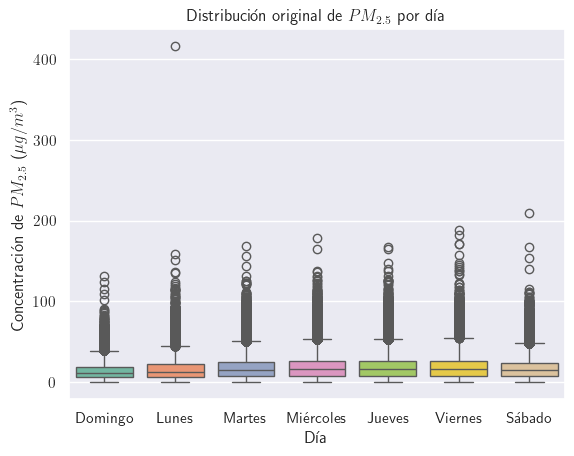

In [76]:
ax = sns.boxplot(data=df_long, x="Día", y="PM25", hue= "Día",palette='Set2')
ax.set_title(r'Distribución original de $PM_{2.5}$ por día')
ax.set_ylabel(r'Concentración de $PM_{2.5}$ ($\mu g/m^3$)')
plt.savefig('../images/estadisticas/original/dia.png', bbox_inches='tight')
plt.show()


#### Imputado

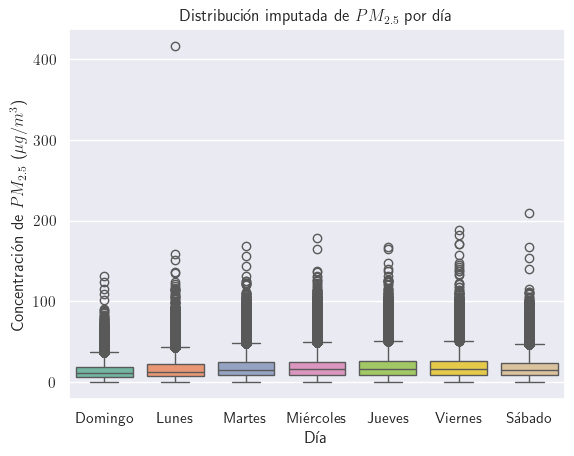

In [77]:
ax = sns.boxplot(data=df_imputado_long, x="Día", y="PM25", hue= "Día",palette='Set2')
ax.set_title(r'Distribución imputada de $PM_{2.5}$ por día')
ax.set_ylabel(r'Concentración de $PM_{2.5}$ ($\mu g/m^3$)')
plt.savefig('../images/estadisticas/imputada/dia.png', bbox_inches='tight')
plt.show()

### Gráficas por mes

#### Original

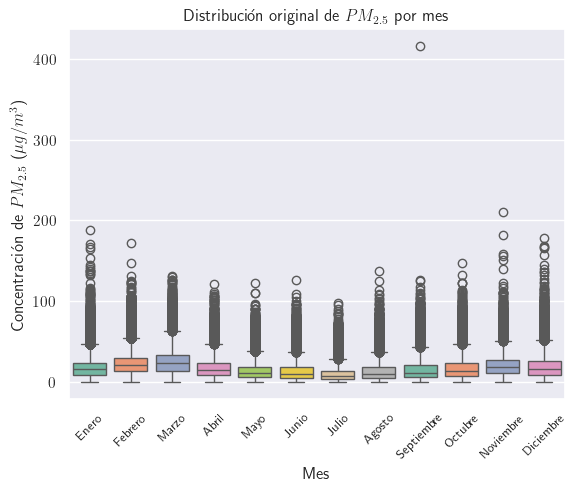

In [74]:
ax = sns.boxplot(data=df_long, x="Mes", y="PM25", hue= "Mes",palette='Set2')
ax.set_title(r'Distribución original de $PM_{2.5}$ por mes')
ax.set_ylabel(r'Concentración de $PM_{2.5}$ ($\mu g/m^3$)')
plt.xticks(rotation=45, fontsize=9)
plt.savefig('../images/estadisticas/original/mes.png', bbox_inches='tight')
plt.show()

#### Imputado

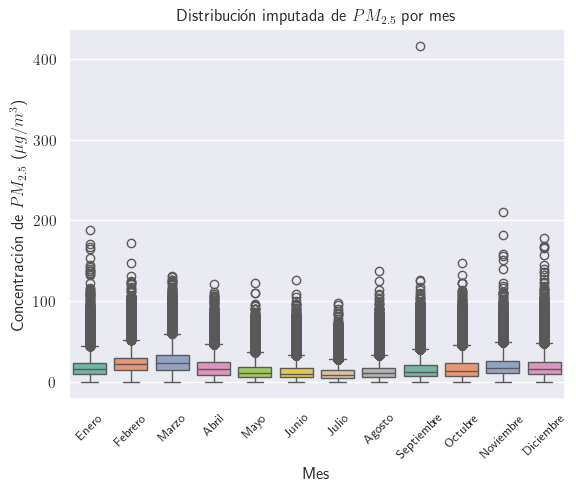

In [78]:
ax = sns.boxplot(data=df_imputado_long, x="Mes", y="PM25", hue= "Mes",palette='Set2')
ax.set_title(r'Distribución imputada de $PM_{2.5}$ por mes')
ax.set_ylabel(r'Concentración de $PM_{2.5}$ ($\mu g/m^3$)')
plt.xticks(rotation=45, fontsize=9)
plt.savefig('../images/estadisticas/imputada/mes.png', bbox_inches='tight')
plt.show()

### Gráficas por año

#### Original

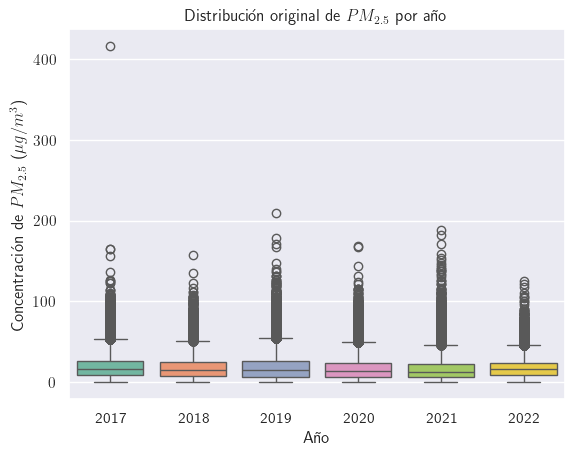

In [81]:
ax = sns.boxplot(data=df_long, x="Año", y="PM25", hue= "Año",palette='Set2')
ax.set_title(r'Distribución original de $PM_{2.5}$ por año')
ax.set_ylabel(r'Concentración de $PM_{2.5}$ ($\mu g/m^3$)')
ax.get_legend().remove()
plt.savefig('../images/estadisticas/original/año.png', bbox_inches='tight')
plt.show()

#### Imputado

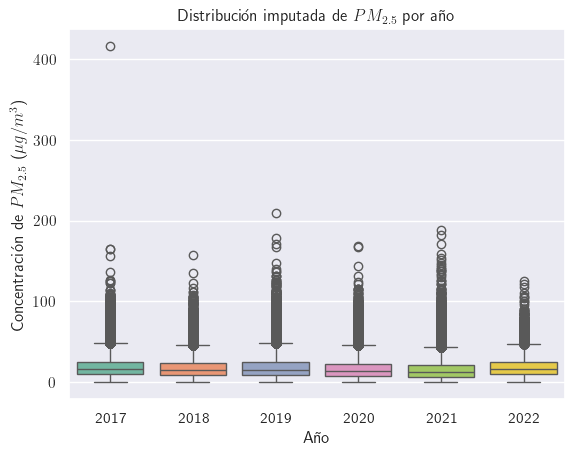

In [82]:
ax = sns.boxplot(data=df_imputado_long, x="Año", y="PM25", hue= "Año",palette='Set2')
ax.set_title(r'Distribución imputada de $PM_{2.5}$ por año')
ax.set_ylabel(r'Concentración de $PM_{2.5}$ ($\mu g/m^3$)')
ax.get_legend().remove()
plt.savefig('../images/estadisticas/imputada/año.png', bbox_inches='tight')
plt.show()

### Gráficas por hora

#### Original

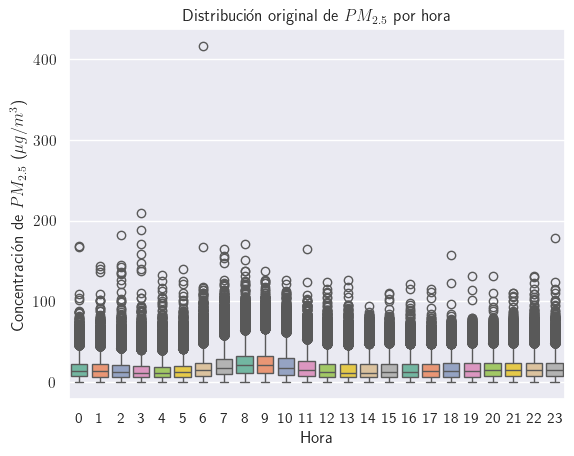

In [83]:
ax = sns.boxplot(data=df_long, x="Hora", y="PM25", hue= "Hora",palette='Set2')
ax.set_title(r'Distribución original de $PM_{2.5}$ por hora')
ax.set_ylabel(r'Concentración de $PM_{2.5}$ ($\mu g/m^3$)')
ax.get_legend().remove()
plt.savefig('../images/estadisticas/original/hora.png', bbox_inches='tight')
plt.show()

#### Imputado

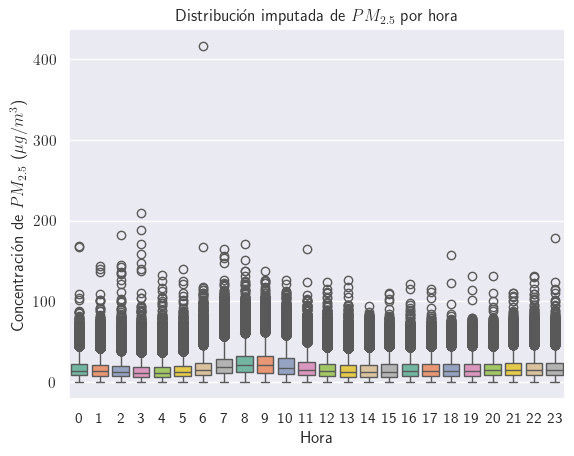

In [84]:
ax = sns.boxplot(data=df_imputado_long, x="Hora", y="PM25", hue= "Hora",palette='Set2')
ax.set_title(r'Distribución imputada de $PM_{2.5}$ por hora')
ax.set_ylabel(r'Concentración de $PM_{2.5}$ ($\mu g/m^3$)')
ax.get_legend().remove()
plt.savefig('../images/estadisticas/imputada/hora.png', bbox_inches='tight')
plt.show()

### Creación de variables por `Estación`

Debemos importar la información de cada estación del archivo `estaciones.csv`.

In [10]:
estaciones = pd.read_csv('../data/estaciones.csv')
estaciones

,Estación,Sigla,Latitud,Longitud,Altitud,Localidad,Tipo_zona,Tipo_estacion
0,Guaymaral,GYR,4.783750,-74.044139,2580,Suba,Sub urbana,De fondo
1,Usaquen,USQ,4.710350,-74.030417,2570,Usaquén,Urbana,De fondo
2,Suba,SUB,4.761247,-74.093461,2571,Suba,Sub urbana,De fondo
3,Bolivia,BOL,4.735806,-74.125889,2574,Engativá,Sub urbana,De fondo
4,Las Ferias,LFR,4.690700,-74.082483,2552,Engativá,Urbana,De tráfico
5,Centro de Alto Rendimiento,CDAR,4.658467,-74.083967,2552,Engativá,Urbana,De tráfico
6,Movil 7ma,SEPMA,4.645194,-74.061556,2583,Chapinero,Urbana,De tráfico
7,MinAmbiente,MAM,4.625486,-74.066981,2621,Santa Fe,Urbana,De tráfico
8,Fontibon,FTB,4.678242,-74.143819,2551,Fontibón,Urbana,De tráfico
9,Puente Aranda,PTE,4.631767,-74.117483,2590,Puente Aranda,Urbana,Industrial


#### Realizar join

Se debe hacer un left join para que estas características de las estaciones queden en los dataframe original e imputado, que están en formato largo.

Primero debemos limpiar el nombre de las estaciones para que sean compatibles con los que se encuentran en el dataframe `estaciones`.

In [17]:
df_imputado_long['Estación'] = df_imputado_long['Estación'].str.replace(r'...',' - ').str.replace(r'.',' ')
df_imputado_long['Estación'].unique()

array(['Bolivia', 'Bosa', 'Carvajal - Sevillana',
       'Centro de Alto Rendimiento', 'Ciudad Bolivar', 'Colina',
       'Fontibon', 'Guaymaral', 'Jazmin', 'Kennedy', 'Las Ferias',
       'MinAmbiente', 'Movil Fontibon', 'Movil 7ma', 'Puente Aranda',
       'San Cristobal', 'Suba', 'Tunal', 'Usaquen', 'Usme'], dtype=object)

Verificamos que al hacer un left join no se va a obtener valores nulos.

In [18]:
df_imputado_long.merge(estaciones,on='Estación', how='left').isna().sum()

Fecha            0
Estación         0
PM25             0
Día              0
Mes              0
Año              0
Hora             0
Sigla            0
Latitud          0
Longitud         0
Altitud          0
Localidad        0
Tipo_zona        0
Tipo_estacion    0
dtype: int64

Realizamos el left join sobre el dataframe imputado (`df_imputado_long`)

In [19]:
df_imputado_long = df_imputado_long.merge(estaciones,on='Estación', how='left')
df_imputado_long

,Fecha,Estación,PM25,Día,Mes,Año,Hora,Sigla,Latitud,Longitud,Altitud,Localidad,Tipo_zona,Tipo_estacion
0,2017-01-01 01:00:00,Bolivia,19.58,Domingo,Enero,2017,1,BOL,4.735806,-74.125889,2574,Engativá,Sub urbana,De fondo
1,2017-01-01 02:00:00,Bolivia,31.80,Domingo,Enero,2017,2,BOL,4.735806,-74.125889,2574,Engativá,Sub urbana,De fondo
2,2017-01-01 03:00:00,Bolivia,23.14,Domingo,Enero,2017,3,BOL,4.735806,-74.125889,2574,Engativá,Sub urbana,De fondo
3,2017-01-01 04:00:00,Bolivia,15.08,Domingo,Enero,2017,4,BOL,4.735806,-74.125889,2574,Engativá,Sub urbana,De fondo
4,2017-01-01 05:00:00,Bolivia,9.86,Domingo,Enero,2017,5,BOL,4.735806,-74.125889,2574,Engativá,Sub urbana,De fondo
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
963355,2022-06-30 20:00:00,Usme,3.00,Jueves,Junio,2022,20,USM,4.532056,-74.117139,2593,Usme,Urbana,Residencial
963356,2022-06-30 21:00:00,Usme,2.70,Jueves,Junio,2022,21,USM,4.532056,-74.117139,2593,Usme,Urbana,Residencial
963357,2022-06-30 22:00:00,Usme,2.70,Jueves,Junio,2022,22,USM,4.532056,-74.117139,2593,Usme,Urbana,Residencial
963358,2022-06-30 23:00:00,Usme,2.50,Jueves,Junio,2022,23,USM,4.532056,-74.117139,2593,Usme,Urbana,Residencial


Corregimos la variable `Estación` del dataframe original con la misma variable del dataframe imputado para luego hacer un left join con este dataframe también.

In [20]:
df_long['Estación'] = df_imputado_long['Estación']
df_long.Estación.unique()

array(['Bolivia', 'Bosa', 'Carvajal - Sevillana',
       'Centro de Alto Rendimiento', 'Ciudad Bolivar', 'Colina',
       'Fontibon', 'Guaymaral', 'Jazmin', 'Kennedy', 'Las Ferias',
       'MinAmbiente', 'Movil Fontibon', 'Movil 7ma', 'Puente Aranda',
       'San Cristobal', 'Suba', 'Tunal', 'Usaquen', 'Usme'], dtype=object)

Realizamos el left join.

In [21]:
df_long = df_long.merge(estaciones, on= 'Estación', how= 'left')
df_long

,Fecha,Estación,PM25,Día,Mes,Año,Hora,Sigla,Latitud,Longitud,Altitud,Localidad,Tipo_zona,Tipo_estacion
0,2017-01-01 01:00:00,Bolivia,NaN,Domingo,Enero,2017,1,BOL,4.735806,-74.125889,2574,Engativá,Sub urbana,De fondo
1,2017-01-01 02:00:00,Bolivia,NaN,Domingo,Enero,2017,2,BOL,4.735806,-74.125889,2574,Engativá,Sub urbana,De fondo
2,2017-01-01 03:00:00,Bolivia,NaN,Domingo,Enero,2017,3,BOL,4.735806,-74.125889,2574,Engativá,Sub urbana,De fondo
3,2017-01-01 04:00:00,Bolivia,NaN,Domingo,Enero,2017,4,BOL,4.735806,-74.125889,2574,Engativá,Sub urbana,De fondo
4,2017-01-01 05:00:00,Bolivia,NaN,Domingo,Enero,2017,5,BOL,4.735806,-74.125889,2574,Engativá,Sub urbana,De fondo
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
963355,2022-06-30 20:00:00,Usme,3.0,Jueves,Junio,2022,20,USM,4.532056,-74.117139,2593,Usme,Urbana,Residencial
963356,2022-06-30 21:00:00,Usme,2.7,Jueves,Junio,2022,21,USM,4.532056,-74.117139,2593,Usme,Urbana,Residencial
963357,2022-06-30 22:00:00,Usme,2.7,Jueves,Junio,2022,22,USM,4.532056,-74.117139,2593,Usme,Urbana,Residencial
963358,2022-06-30 23:00:00,Usme,2.5,Jueves,Junio,2022,23,USM,4.532056,-74.117139,2593,Usme,Urbana,Residencial


### Gráficas por estación

#### Original

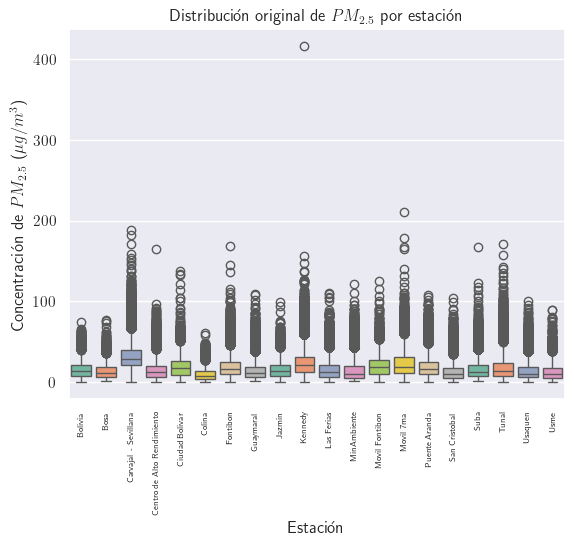

In [113]:
ax = sns.boxplot(data=df_long, x="Estación", y="PM25", hue= "Estación",palette='Set2')
ax.set_title(r'Distribución original de $PM_{2.5}$ por estación')
ax.set_ylabel(r'Concentración de $PM_{2.5}$ ($\mu g/m^3$)')
plt.xticks(rotation=90, fontsize=6)
plt.savefig('../images/estadisticas/original/estación.png', bbox_inches='tight')
plt.show()

#### Imputado

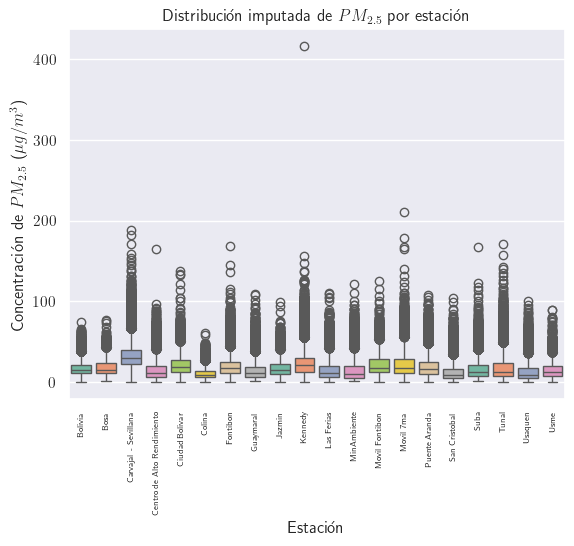

In [114]:
ax = sns.boxplot(data=df_imputado_long, x="Estación", y="PM25", hue= "Estación",palette='Set2')
ax.set_title(r'Distribución imputada de $PM_{2.5}$ por estación')
ax.set_ylabel(r'Concentración de $PM_{2.5}$ ($\mu g/m^3$)')
plt.xticks(rotation=90, fontsize=6)
plt.savefig('../images/estadisticas/imputada/estación.png', bbox_inches='tight')
plt.show()

### Gráficas por localidad

#### Original

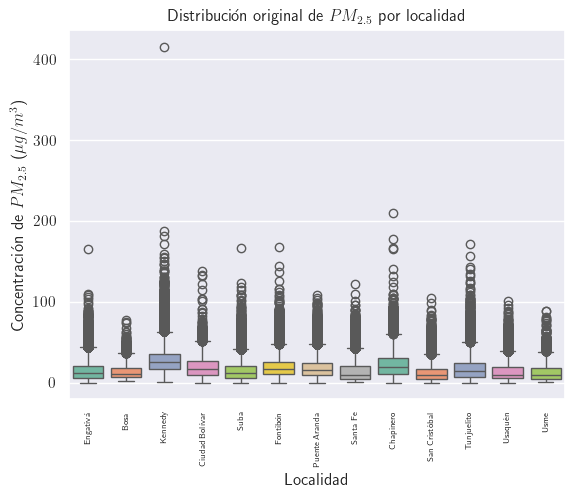

In [115]:
ax = sns.boxplot(data=df_long, x="Localidad", y="PM25", hue= "Localidad",palette='Set2')
ax.set_title(r'Distribución original de $PM_{2.5}$ por localidad')
ax.set_ylabel(r'Concentración de $PM_{2.5}$ ($\mu g/m^3$)')
plt.xticks(rotation=90, fontsize=6)
plt.savefig('../images/estadisticas/original/localidad.png', bbox_inches='tight')
plt.show()

#### Imputado

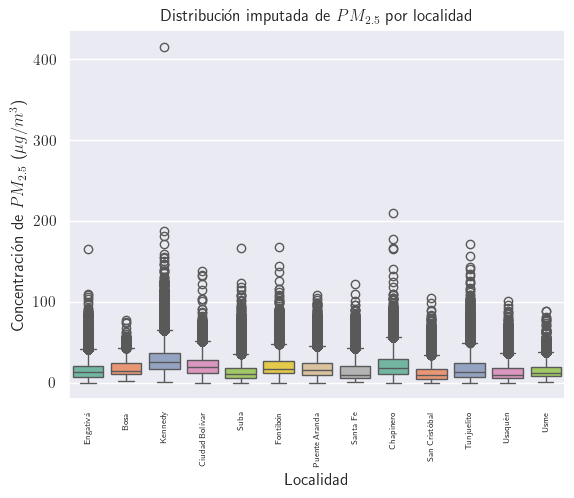

In [116]:
ax = sns.boxplot(data=df_imputado_long, x="Localidad", y="PM25", hue= "Localidad",palette='Set2')
ax.set_title(r'Distribución imputada de $PM_{2.5}$ por localidad')
ax.set_ylabel(r'Concentración de $PM_{2.5}$ ($\mu g/m^3$)')
plt.xticks(rotation=90, fontsize=6)
plt.savefig('../images/estadisticas/imputada/localidad.png', bbox_inches='tight')
plt.show()

### Gráficas por tipo de zona

#### Original

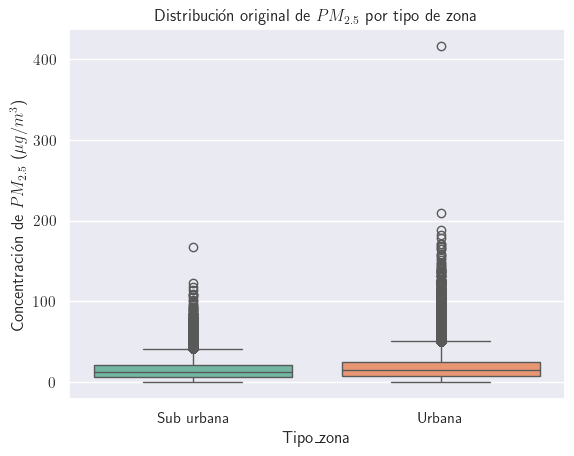

In [118]:
ax = sns.boxplot(data=df_long, x="Tipo_zona", y="PM25", hue= "Tipo_zona",palette='Set2')
ax.set_title(r'Distribución original de $PM_{2.5}$ por tipo de zona')
ax.set_ylabel(r'Concentración de $PM_{2.5}$ ($\mu g/m^3$)')
plt.savefig('../images/estadisticas/original/tipo de zona.png', bbox_inches='tight')
plt.show()

#### Imputado

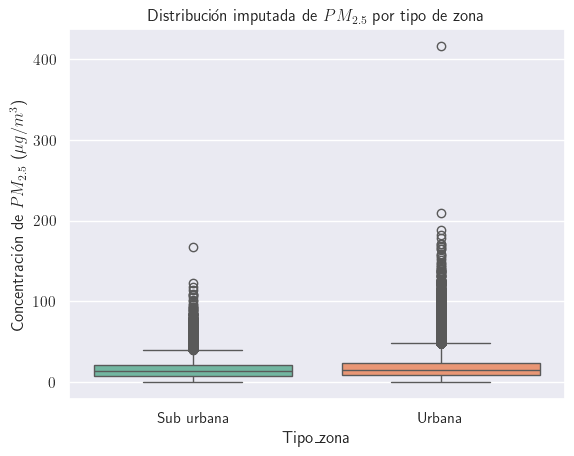

In [119]:
ax = sns.boxplot(data=df_imputado_long, x="Tipo_zona", y="PM25", hue= "Tipo_zona",palette='Set2')
ax.set_title(r'Distribución imputada de $PM_{2.5}$ por tipo de zona')
ax.set_ylabel(r'Concentración de $PM_{2.5}$ ($\mu g/m^3$)')
plt.savefig('../images/estadisticas/imputada/tipo de zona.png', bbox_inches='tight')
plt.show()

### Gráficas por tipo de estación

#### Original

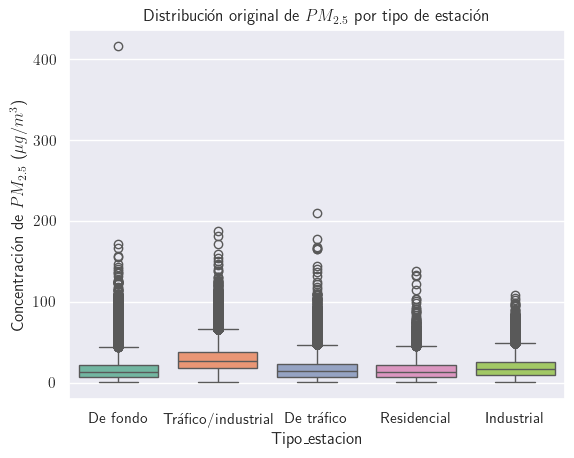

In [120]:
ax = sns.boxplot(data=df_long, x="Tipo_estacion", y="PM25", hue= "Tipo_estacion",palette='Set2')
ax.set_title(r'Distribución original de $PM_{2.5}$ por tipo de estación')
ax.set_ylabel(r'Concentración de $PM_{2.5}$ ($\mu g/m^3$)')
plt.savefig('../images/estadisticas/original/tipo de estación.png', bbox_inches='tight')
plt.show()

#### Imputado

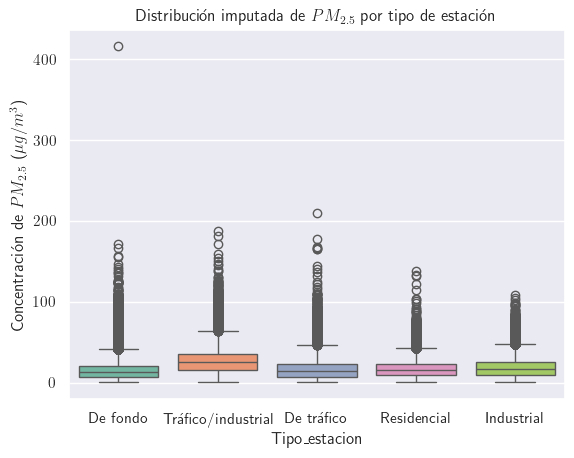

In [121]:
ax = sns.boxplot(data=df_imputado_long, x="Tipo_estacion", y="PM25", hue= "Tipo_estacion",palette='Set2')
ax.set_title(r'Distribución imputada de $PM_{2.5}$ por tipo de estación')
ax.set_ylabel(r'Concentración de $PM_{2.5}$ ($\mu g/m^3$)')
plt.savefig('../images/estadisticas/imputada/tipo de estación.png', bbox_inches='tight')
plt.show()

## Gráficas de series temporales

### Original

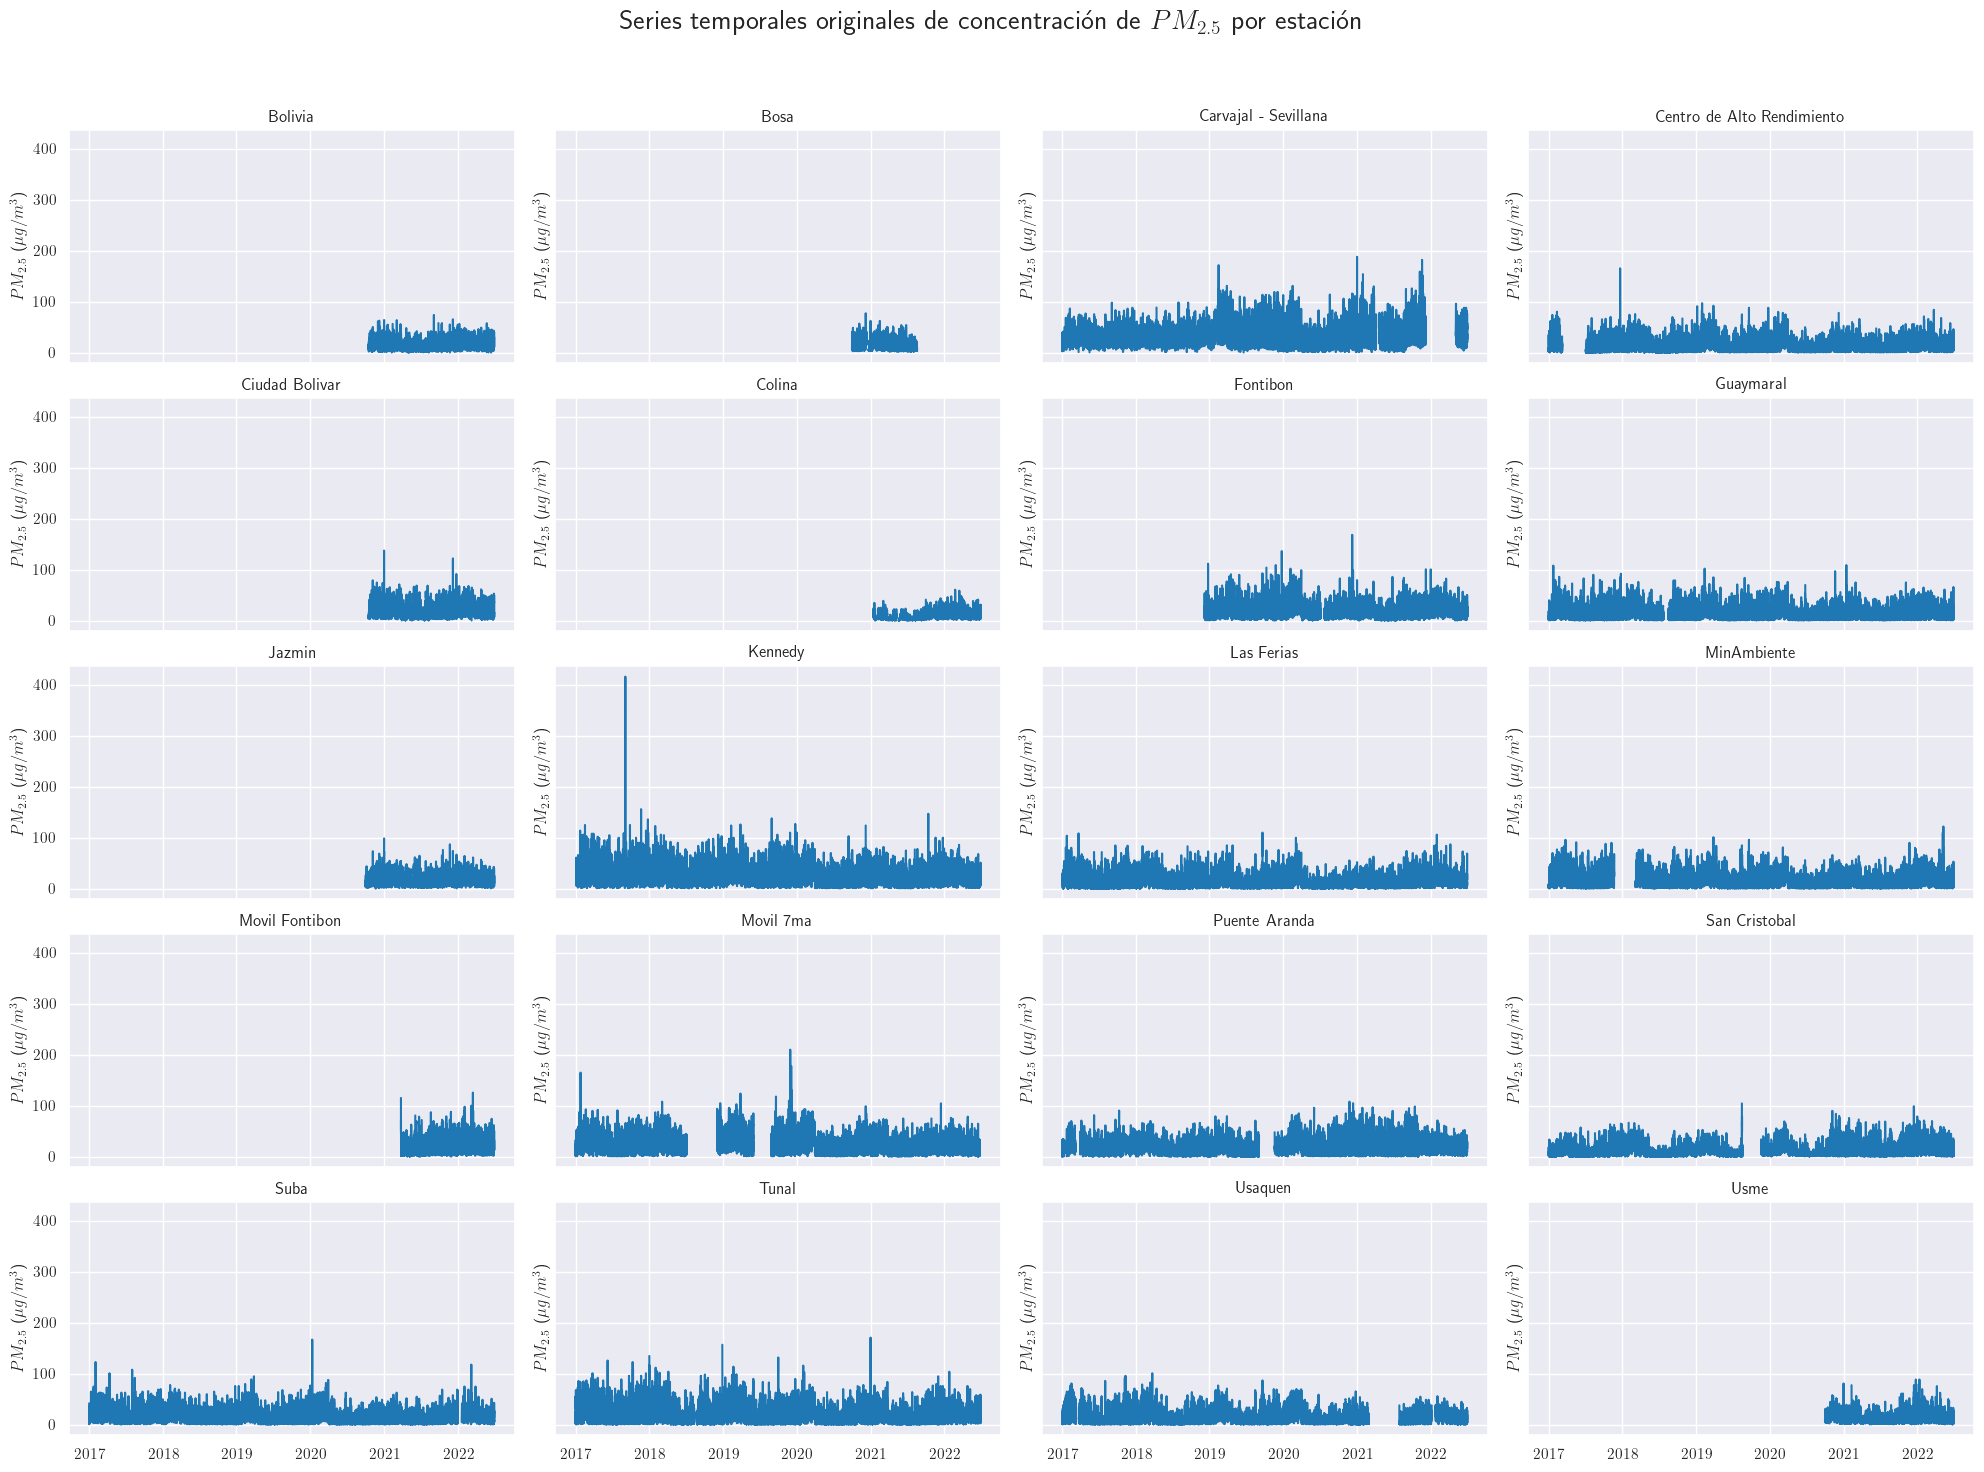

In [34]:
fig, axes = plt.subplots(nrows=5, ncols=4, figsize=(20, 15), sharex=True, sharey=True)


axes = axes.flatten()


Estaciones = df_long['Estación'].unique()


for i, estacion in enumerate(Estaciones):
    subset = df_long[df_long['Estación'] == estacion]
    axes[i].plot(subset['Fecha'], subset['PM25'])
    axes[i].set_title(estacion)
    axes[i].set_ylabel(r'$PM_{2.5}$ ($\mu g/m^3$)')

plt.tight_layout()

fig.suptitle(r'Series temporales originales de concentración de $PM_{2.5}$  por estación', fontsize=20)

plt.subplots_adjust(top=0.9)

plt.savefig('../images/estadisticas/original/series.png', bbox_inches='tight')

plt.show()

### Imputada

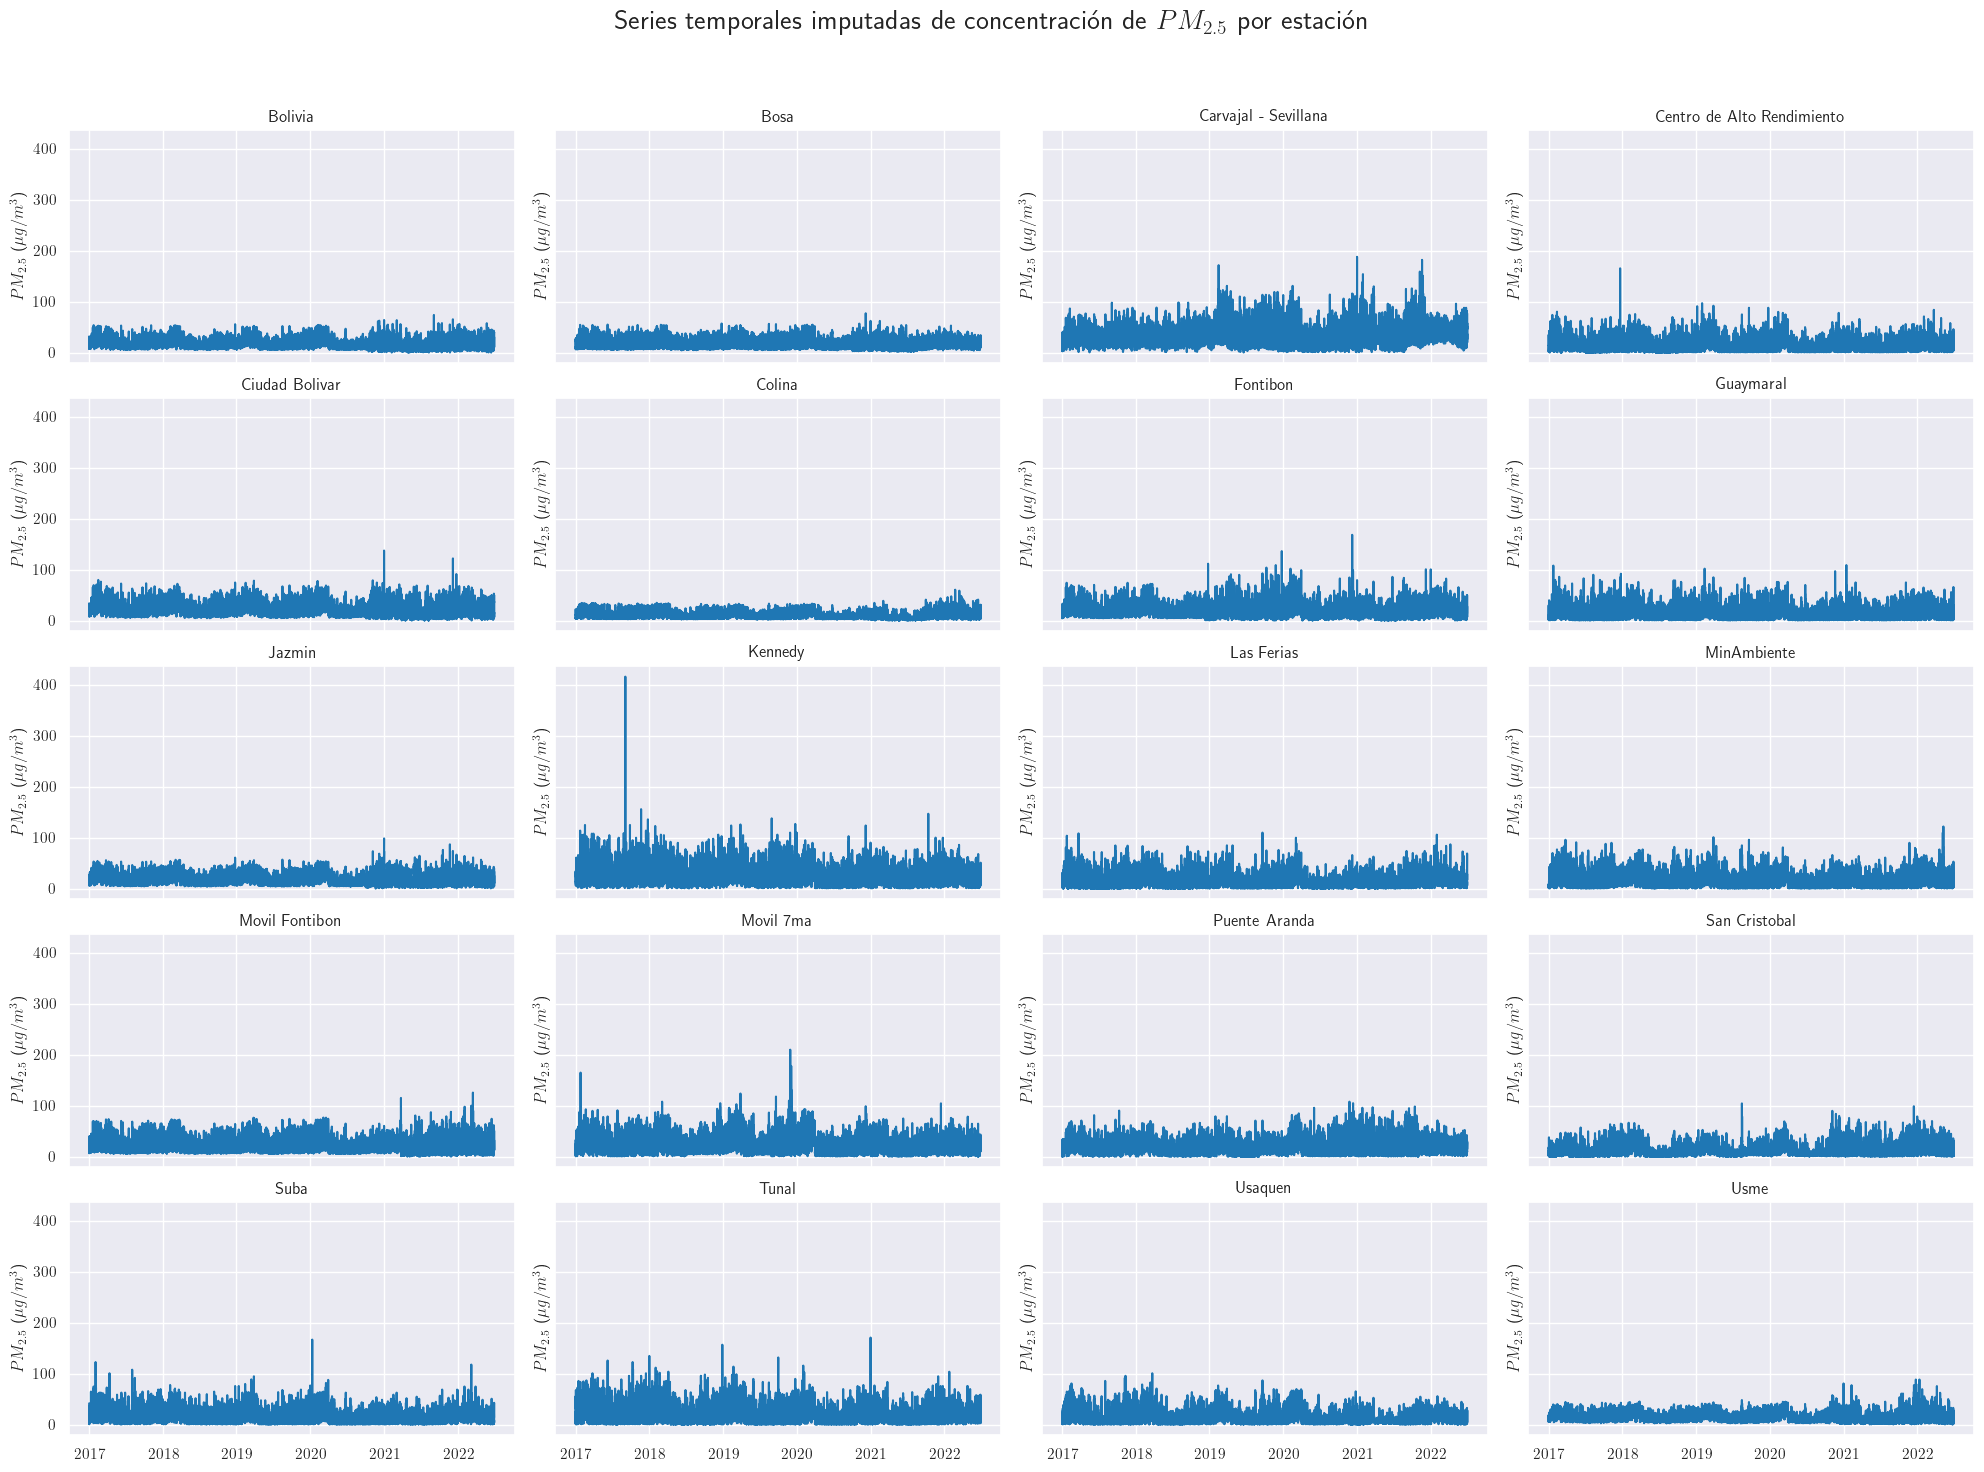

In [35]:
fig, axes = plt.subplots(nrows=5, ncols=4, figsize=(20, 15), sharex=True, sharey=True)


axes = axes.flatten()


Estaciones = df_imputado_long['Estación'].unique()


for i, estacion in enumerate(Estaciones):
    subset = df_imputado_long[df_imputado_long['Estación'] == estacion]
    axes[i].plot(subset['Fecha'], subset['PM25'])
    axes[i].set_title(estacion)
    axes[i].set_ylabel(r'$PM_{2.5}$ ($\mu g/m^3$)')

plt.tight_layout()

fig.suptitle(r'Series temporales imputadas de concentración de $PM_{2.5}$  por estación', fontsize=20)

plt.subplots_adjust(top=0.9)

plt.savefig('../images/estadisticas/imputada/series.png', bbox_inches='tight')

plt.show()

# Modelo Spatio-Temporal Graph Convolutional Networks (ST-GCN)

Las Spatio-Temporal Graph Convolutional Networks (ST-GCN) son una clase avanzada de modelos de deep learning diseñados para manejar datos con dependencias espaciales y temporales, como los datos de concentración de contaminación en diferentes ubicaciones a lo largo del tiempo.
Fundamentos de ST-GCN

Los ST-GCN combinan conceptos de grafos y convoluciones temporales para capturar simultáneamente las dependencias espaciales (ubicaciones) y temporales (a lo largo del tiempo). Aquí hay un desglose de cómo funcionan:

## Representación de datos como grafos

En ST-GCN, los datos son representados como un grafo donde:

- Nodos (Vértices): Representan ubicaciones o puntos específicos (por ejemplo, estaciones de monitoreo de contaminación).
- Aristas (Edges): Representan las relaciones o conexiones entre estos nodos (por ejemplo, proximidad geográfica o similitud en los niveles de contaminación).
- Características de Nodos: A cada nodo se le asigna una serie temporal de características (por ejemplo, las concentraciones de contaminantes a lo largo del tiempo).

## Convoluciones en Grafos (Spatial Convolutions)

La parte espacial del ST-GCN se maneja a través de convoluciones en grafos:

- Convoluciones en Grafos: Se aplican operaciones de convolución sobre el grafo para extraer características espaciales. Estas operaciones consideran no solo las características de un nodo en particular, sino también las características de sus nodos vecinos.
- Operador de Convolución en Grafos: Un ejemplo común es el operador de convolución de Chebyshev o el operador basado en la Laplaciana del grafo, que permite difundir la información a través de la estructura del grafo.

## Convoluciones Temporales

La parte temporal del ST-GCN se maneja a través de convoluciones en el dominio temporal:

- Convoluciones 1D: Se aplican convoluciones a lo largo del eje temporal de las características de los nodos para capturar patrones y dependencias temporales.
- Dependencias Temporales: Estas convoluciones ayudan a modelar cómo las concentraciones de contaminación cambian a lo largo del tiempo en cada ubicación.

## Capas de ST-GCN

Un modelo típico de ST-GCN tiene múltiples capas, donde cada capa realiza las siguientes operaciones:

- Convolución Espacial: Aplica una convolución sobre el grafo para actualizar las características de los nodos basándose en sus vecinos.
- Convolución Temporal: Aplica una convolución sobre la serie temporal de características para capturar dependencias a lo largo del tiempo.
- Activación: Se aplica una función de activación no lineal (por ejemplo, ReLU) después de cada convolución.
- Normalización: Opcionalmente, se pueden aplicar técnicas de normalización (como batch normalization) para estabilizar el entrenamiento.

## Integración y Predicción

- Integración de Capas: Las capas de ST-GCN se apilan, permitiendo que el modelo capture patrones complejos espaciales y temporales a través de múltiples niveles de abstracción.
- Capa de Predicción: Finalmente, se utiliza una capa de salida (por ejemplo, una capa densa) para realizar la predicción final (por ejemplo, la concentración de contaminantes en el futuro).

Ejemplo Simplificado de Flujo de ST-GCN

- Entrada: Datos de contaminación representados en un grafo con nodos (estaciones) y aristas (relaciones entre estaciones). Cada nodo tiene una serie temporal de concentraciones de contaminantes.
- Convolución Espacial: Se aplican convoluciones en el grafo para obtener características espaciales.
- Convolución Temporal: Se aplican convoluciones a lo largo del tiempo para capturar patrones temporales.
- Repetición: Estas operaciones se repiten en múltiples capas para capturar características más profundas.
- Salida: Se obtienen predicciones de concentraciones futuras de contaminantes.

## Ventajas de ST-GCN

- Captura de Dependencias Complejas: Puede modelar tanto las dependencias espaciales como temporales de manera integrada.
- Flexibilidad: Puede manejar datos estructurados en forma de grafos, lo que es útil para muchas aplicaciones del mundo real.
- Escalabilidad: Diseñado para escalar con grandes volúmenes de datos espacio-temporales.

## Implementación

La implementación de ST-GCN típicamente se realiza utilizando frameworks de deep learning como TensorFlow o PyTorch, con extensiones como PyTorch Geometric para manejar operaciones de grafos. En este caso, utilizaremos el framework `PyTorch`.

# Construcción del modelo ST-GCN

## Preparación de los datos

Primero corregimos los nombres de las columnas del dataframe imputado en su formato original, convertimos `Fecha` en índice y ordenamos en órden alfabético las columnas.

In [11]:
df_imputado.columns = df.columns
df_imputado.set_index('Fecha', inplace= True)
df_imputado = df_imputado.sort_index(axis= 1)
df_imputado.columns

Index(['Bolivia', 'Bosa', 'Carvajal - Sevillana', 'Centro de Alto Rendimiento',
       'Ciudad Bolivar', 'Colina', 'Fontibon', 'Guaymaral', 'Jazmin',
       'Kennedy', 'Las Ferias', 'MinAmbiente', 'Movil 7ma', 'Movil Fontibon',
       'Puente Aranda', 'San Cristobal', 'Suba', 'Tunal', 'Usaquen', 'Usme'],
      dtype='object')

In [12]:
df_imputado

,Bolivia,Bosa,Carvajal - Sevillana,Centro de Alto Rendimiento,Ciudad Bolivar,Colina,Fontibon,Guaymaral,Jazmin,Kennedy,Las Ferias,MinAmbiente,Movil 7ma,Movil Fontibon,Puente Aranda,San Cristobal,Suba,Tunal,Usaquen,Usme
Fecha,,,,,,,,,,,,,,,,,,,,
2017-01-01 01:00:00,19.58,22.89,21.2,14.2,23.67,10.60,22.67,3.00,14.52,23.76,16.14,6.0,6.00,25.87,7.4,14.8,42.0,32.0,8.00,14.30
2017-01-01 02:00:00,31.80,26.70,28.6,32.8,32.74,22.40,32.61,30.19,26.87,33.24,30.49,9.0,33.00,35.17,6.0,18.5,34.0,56.0,7.00,18.99
2017-01-01 03:00:00,23.14,27.33,29.9,35.0,34.03,16.12,29.95,2.00,24.69,33.61,30.26,6.0,33.00,39.83,10.0,15.1,36.0,30.0,5.00,17.78
2017-01-01 04:00:00,15.08,11.69,24.2,9.4,15.70,9.84,13.07,10.00,12.54,17.79,7.93,4.0,6.00,11.08,11.5,10.4,24.0,8.0,12.00,12.18
2017-01-01 05:00:00,9.86,7.15,15.6,3.3,10.24,4.02,7.41,13.00,8.27,11.17,4.02,2.0,9.47,8.71,8.2,7.6,10.0,4.0,8.00,7.30
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-06-30 20:00:00,21.00,14.94,48.0,14.0,9.20,9.80,13.00,9.00,25.50,8.00,14.00,13.0,18.09,19.40,16.3,11.0,11.0,12.0,10.56,3.00
2022-06-30 21:00:00,23.70,12.40,58.0,16.0,6.90,7.80,17.90,9.00,18.60,20.00,12.00,14.0,22.43,16.60,18.4,9.0,16.0,17.0,6.00,2.70
2022-06-30 22:00:00,17.10,12.23,52.0,12.0,8.20,6.30,17.00,6.00,16.10,26.00,10.00,9.0,15.22,13.00,15.5,6.0,6.0,13.0,5.00,2.70


Ordenamos la columna `Estación` del dataframe `estaciones` en orden alfabético para que todo esté acorde con el orden de las columnas del dataframe imputado.

In [13]:
estaciones.sort_values('Estación', inplace=True)
estaciones.reset_index(drop=True, inplace= True)
estaciones

,Estación,Sigla,Latitud,Longitud,Altitud,Localidad,Tipo_zona,Tipo_estacion
0,Bolivia,BOL,4.735806,-74.125889,2574,Engativá,Sub urbana,De fondo
1,Bosa,BOS,4.605611,-74.204056,2546,Bosa,Urbana,De fondo
2,Carvajal - Sevillana,CSE,4.595833,-74.148500,2563,Kennedy,Urbana,Tráfico/industrial
3,Centro de Alto Rendimiento,CDAR,4.658467,-74.083967,2552,Engativá,Urbana,De tráfico
4,Ciudad Bolivar,CBV,4.577806,-74.166278,2661,Ciudad Bolívar,Urbana,Residencial
5,Colina,COL,4.737194,-74.069472,2555,Suba,Urbana,De fondo
6,Fontibon,FTB,4.678242,-74.143819,2551,Fontibón,Urbana,De tráfico
7,Guaymaral,GYR,4.783750,-74.044139,2580,Suba,Sub urbana,De fondo
8,Jazmin,JAZ,4.608500,-74.114944,2559,Puente Aranda,Urbana,Residencial
9,Kennedy,KEN,4.625050,-74.161333,2580,Kennedy,Urbana,De fondo


Se verifica que el orden de la columna estaciones en el dataframe `estaciones` sea el mismo que la lista de los nombres del dataframe `df_imputado`.

In [14]:
estaciones.Estación == df_imputado.columns

0     True
1     True
2     True
3     True
4     True
5     True
6     True
7     True
8     True
9     True
10    True
11    True
12    True
13    True
14    True
15    True
16    True
17    True
18    True
19    True
dtype: bool

Se crea una matriz con las concentraciones a partir del dataframe `df_imputado` que su dimensionalidad sea $nodos \times tiempo$. Vale aclarar que ya se eliminó la variable `Fecha` y se debe trasponer el dataframe para crear esta matriz.

In [15]:
data_matrix = df_imputado.T.to_numpy()
data_matrix

array([[19.58, 31.8 , 23.14, ..., 17.1 , 15.2 , 30.2 ],
       [22.89, 26.7 , 27.33, ..., 12.23, 14.11, 16.17],
       [21.2 , 28.6 , 29.9 , ..., 52.  , 46.  , 51.  ],
       ...,
       [32.  , 56.  , 30.  , ..., 13.  , 19.  , 14.  ],
       [ 8.  ,  7.  ,  5.  , ...,  5.  ,  6.43,  5.52],
       [14.3 , 18.99, 17.78, ...,  2.7 ,  2.5 ,  7.5 ]])

A continuación se crea el grafo espacial utilizando la distancia geográfica entre estaciones para definir las conexiones del grafo, es decir, crear una matriz de adyacencia basada en la distancia.

Primero se obtienen las coordenadas de las estaciones por medio de la creación de un dataframe que tenga como índices el nombre de las estaciones y como columnas la latitud y la longitud.

In [16]:
from sklearn.metrics.pairwise import haversine_distances
import scipy.sparse as sp

coords = estaciones[['Estación','Latitud', 'Longitud']]
coords.set_index('Estación', inplace=True)
coords

,Latitud,Longitud
Estación,,
Bolivia,4.735806,-74.125889
Bosa,4.605611,-74.204056
Carvajal - Sevillana,4.595833,-74.148500
Centro de Alto Rendimiento,4.658467,-74.083967
Ciudad Bolivar,4.577806,-74.166278
Colina,4.737194,-74.069472
Fontibon,4.678242,-74.143819
Guaymaral,4.783750,-74.044139
Jazmin,4.608500,-74.114944


Ahora se calcula la distancia entre todas las estaciones.

In [17]:
dist = haversine_distances(np.radians(coords[['Latitud', 'Longitud']]))
dist

array([[0.        , 0.00264809, 0.00247445, 0.0015342 , 0.00284572,
        0.0009816 , 0.00105198, 0.00164984, 0.00223005, 0.002029  ,
        0.00109078, 0.00218114, 0.00193736, 0.00124708, 0.0018217 ,
        0.00294181, 0.00071784, 0.00278661, 0.00171905, 0.00355936],
       [0.00264809, 0.        , 0.00098146, 0.00228372, 0.00081698,
        0.00327949, 0.00164469, 0.00417187, 0.00155109, 0.00081701,
        0.00258421, 0.00240975, 0.00257346, 0.00145593, 0.00157374,
        0.00217   , 0.00332861, 0.00137127, 0.00353066, 0.00198362],
       [0.00247445, 0.00098146, 0.        , 0.00156695, 0.0004412 ,
        0.00282436, 0.00144061, 0.00374865, 0.00062423, 0.00055666,
        0.00201504, 0.00150966, 0.00174067, 0.00125955, 0.00082735,
        0.00119647, 0.00304163, 0.00045856, 0.00286606, 0.00123965],
       [0.0015342 , 0.00228372, 0.00156695, 0.        , 0.00200807,
        0.00139699, 0.00109686, 0.00229372, 0.00102515, 0.0014668 ,
        0.00056316, 0.00064704, 0.00045349, 0

Y por último, creamos la matriz de adyacencia filtrando por un umbral de conexión entre las estaciones que se dará en kilómetros pero, por la naturaleza de las coordenadas, se deben transformar a radianes.

En este caso, se usará un umbral de conexión entre estaciones de 8 kilómetros.

In [18]:
umbral_km = 8
umbral_rad = umbral_km/6371

adj_matrix = (dist < umbral_rad).astype(int)

adj_matrix = sp.coo_matrix(adj_matrix)

adj_matrix

<COOrdinate sparse matrix of dtype 'int32'
	with 142 stored elements and shape (20, 20)>

## Construir el modelo

Continuando con el modelo, se construye el modelo ST-GCN usando PyTorch Geometric para ello. Como primera medida, se definen los tensores de características y etiquetas.

- El tensor de las características `x` será definido a partir de los datos de concentración y será un tensor de rango 3 con índices $(\#estaciones \times \#fechas \times 1)$.
- El tensor de las etiquetas `y` será definido también a partir de los datos de concentración y será un tensor de rango 2 con índices $(\#estaciones \times \#fechas)$.

In [39]:
import torch
from torch_geometric.data import Data
from torch_geometric.utils import from_scipy_sparse_matrix

x = torch.tensor(data_matrix, dtype= torch.float).unsqueeze(-1)
y = torch.tensor(data_matrix, dtype= torch.float)

Como segunda medida, se crean los objetos `Data` de PyTorch Geometric a partir de los pesos de cada nodo del grafo (que se construye con la matriz de adyacencia) y los tensores creados anteriormente divididos en `x_train`, `x_val`, `x_test`, `y_train`, `y_val` y `y_test`. Donde se tienen 80% para entrenamiento, 15% para validación y 5% para test.

In [41]:
edge_index, edge_weight = from_scipy_sparse_matrix(adj_matrix)
edge_weight = edge_weight.float()
edge_index = edge_index.long()

# Total de fechas por hora
num_time_steps = x.shape[1]

# Calcular los índices para las divisiones
train_size = int(0.80 * num_time_steps)
val_size = int(0.15 * num_time_steps)
test_size = num_time_steps - train_size - val_size

# Dividir los datos en entrenamiento, validación y prueba
x_train, x_val, x_test = x[:, :train_size, :], x[:, train_size:train_size+val_size, :], x[:, train_size+val_size:, :]
y_train, y_val, y_test = y[:, :train_size], y[:, train_size:train_size+val_size], y[:, train_size+val_size:]

# Crear los objetos Data para PyTorch Geometric
train_data = Data(x=x_train, edge_index=data.edge_index, edge_attr=data.edge_attr, y=y_train)
val_data = Data(x=x_val, edge_index=data.edge_index, edge_attr=data.edge_attr, y=y_val)
test_data = Data(x=x_test, edge_index=data.edge_index, edge_attr=data.edge_attr, y=y_test)



## Definir el modelo

In [42]:
import torch.nn as nn
from torch_geometric.nn import GCNConv

class STGCN(nn.Module):
    def __init__(self, in_channels, out_channels):
        super(STGCN, self).__init__()
        self.gcn = GCNConv(in_channels, out_channels)
        self.temporal_conv = nn.Conv1d(out_channels, out_channels, kernel_size=3, padding=1)
        self.fc = nn.Linear(out_channels, 1)
    
    def forward(self, data):
        x, edge_index, edge_weight = data.x, data.edge_index, data.edge_attr
        # Aplicar convolución espacial
        x = self.gcn(x, edge_index, edge_weight)
        x = torch.relu(x)
        
        # Reorganizar para aplicar convolución temporal
        x = x.permute(0, 2, 1)  # (estaciones, concentración, fechas)
        x = self.temporal_conv(x)
        x = torch.relu(x)
        x = x.permute(0, 2, 1)  # (estaciones, fechas, concentración)
        
        # Aplicar capa final de predicción
        x = self.fc(x)
        return x


In [69]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch_geometric.nn import GCNConv

class STGCN(nn.Module):
    def __init__(self, in_channels, out_channels):
        super(STGCN, self).__init__()
        self.gcn = GCNConv(in_channels, out_channels)
        self.temporal_conv = nn.Conv1d(out_channels, out_channels, kernel_size=3, padding=1)
        self.fc = nn.Linear(out_channels, 1)
    
    def forward(self, x, edge_index, edge_weight):
        # Aplicar convolución espacial
        x = self.gcn(x, edge_index, edge_weight)
        x = torch.relu(x)
        
        # Reorganizar para aplicar convolución temporal
        num_nodes, num_features = x.size(0), x.size(1)
        x = x.view(num_nodes, num_features, -1).permute(0, 2, 1)  # (num_nodes, num_time_steps, num_features) -> (num_nodes, num_features, num_time_steps)
        
        x = self.temporal_conv(x)
        x = torch.relu(x)
        
        x = x.permute(0, 2, 1)  # (num_nodes, num_features, num_time_steps) -> (num_nodes, num_time_steps, num_features)
        
        # Aplicar capa final de predicción
        x = self.fc(x)
        return x

## Instanciar el modelo

### Parámetros del Modelo ST-GCN

- `in_channels`:Este parámetro indica el número de canales de entrada para cada nodo en el grafo.En este caso, `in_channels=1` significa que cada nodo en el grafo tiene una característica de entrada. Por ejemplo, si estás utilizando concentraciones de $PM_{2.5}$ como característica, cada nodo tendría un valor de PM2.5 en cada instante de tiempo.

- `out_channels`: Este parámetro indica el número de canales de salida después de aplicar la convolución espacial y temporal. En este caso, `out_channels=16` significa que después de aplicar las operaciones de convolución en el grafo, cada nodo tendrá 16 características.

### Contexto del ST-GCN

Un modelo ST-GCN combina convoluciones espaciales (para capturar dependencias espaciales entre nodos) y convoluciones temporales (para capturar dependencias temporales).

In [85]:
model = STGCN(in_channels=1, out_channels=16)

## Entrenar el modelo

### Definir el ciclo de entrenamiento y validación

Se crean las funciones de entrenamiento y validación.

In [86]:
import torch.optim as optim
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import torch

def calculate_metrics(true, pred):
    true_np = true.cpu().detach().numpy().flatten()
    pred_np = pred.cpu().detach().numpy().flatten()
    
    mse = mean_squared_error(true_np, pred_np)
    
    # Calcular RMSE manualmente
    rmse = np.sqrt(mse)
    
    mae = mean_absolute_error(true_np, pred_np)
    r2 = r2_score(true_np, pred_np)
    
    return mse, rmse, mae, r2

def train(model, optimizer, criterion, data):
    model.train()
    optimizer.zero_grad()
    output = model(data.x, data.edge_index, data.edge_attr)
    loss = criterion(output, data.y.unsqueeze(-1))
    loss.backward()
    optimizer.step()
    return loss.item()

def evaluate(model, criterion, data):
    model.eval()
    with torch.no_grad():
        output = model(data.x, data.edge_index, data.edge_attr)
        loss = criterion(output, data.y.unsqueeze(-1))
        mse, rmse, mae, r2 = calculate_metrics(data.y, output)
    return loss.item(), mse, rmse, mae, r2

Se define el criterio y el optimizador del modelo.

In [87]:
criterion = torch.nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.01)

## Entrenamiento y validación del modelo

In [88]:
num_epochs = 100
train_losses = []
val_losses = []
val_metrics = {'mse': [], 'rmse': [], 'mae': [], 'r2': []}

for epoch in range(num_epochs):
    train_loss = train(model, optimizer, criterion, train_data)
    val_loss, val_mse, val_rmse, val_mae, val_r2 = evaluate(model, criterion, val_data)
    
    train_losses.append(train_loss)
    val_losses.append(val_loss)
    val_metrics['mse'].append(val_mse)
    val_metrics['rmse'].append(val_rmse)
    val_metrics['mae'].append(val_mae)
    val_metrics['r2'].append(val_r2)
    
    print(f'Epoch {epoch+1}, Train Loss: {train_loss:.4f}, Val Loss: {val_loss:.4f}, Val RMSE: {val_rmse:.4f}')


Epoch 1, Train Loss: 492.6669, Val Loss: 397.5722, Val RMSE: 19.9392
Epoch 2, Train Loss: 423.5092, Val Loss: 333.6909, Val RMSE: 18.2672
Epoch 3, Train Loss: 354.9062, Val Loss: 265.4633, Val RMSE: 16.2930
Epoch 4, Train Loss: 281.5553, Val Loss: 193.1398, Val RMSE: 13.8975
Epoch 5, Train Loss: 203.5109, Val Loss: 121.9634, Val RMSE: 11.0437
Epoch 6, Train Loss: 126.9761, Val Loss: 61.3728, Val RMSE: 7.8341
Epoch 7, Train Loss: 62.0204, Val Loss: 23.6807, Val RMSE: 4.8663
Epoch 8, Train Loss: 21.5094, Val Loss: 23.2502, Val RMSE: 4.8219
Epoch 9, Train Loss: 21.0644, Val Loss: 55.3270, Val RMSE: 7.4382
Epoch 10, Train Loss: 55.5441, Val Loss: 83.8267, Val RMSE: 9.1557
Epoch 11, Train Loss: 86.1864, Val Loss: 87.6965, Val RMSE: 9.3646
Epoch 12, Train Loss: 90.3598, Val Loss: 71.9404, Val RMSE: 8.4818
Epoch 13, Train Loss: 73.4013, Val Loss: 50.3595, Val RMSE: 7.0964
Epoch 14, Train Loss: 50.1778, Val Loss: 32.5806, Val RMSE: 5.7079
Epoch 15, Train Loss: 31.1716, Val Loss: 21.3175, Val R

## Evaluación final en el conjunto de prueba.

In [95]:
test_loss, test_mse, test_rmse, test_mae, test_r2 = evaluate(model, criterion, test_data)
print(f'Test Loss: {test_loss:.4f}, Test RMSE: {test_rmse:.4f}, Test MAE: {test_mae:.4f}, Test R2: {test_r2:.4f}')

Test Loss: 1.5732, Test RMSE: 1.2543, Test MAE: 0.6842, Test R2: 0.9858


# Graficar la pérdida de entrenamiento y validación.

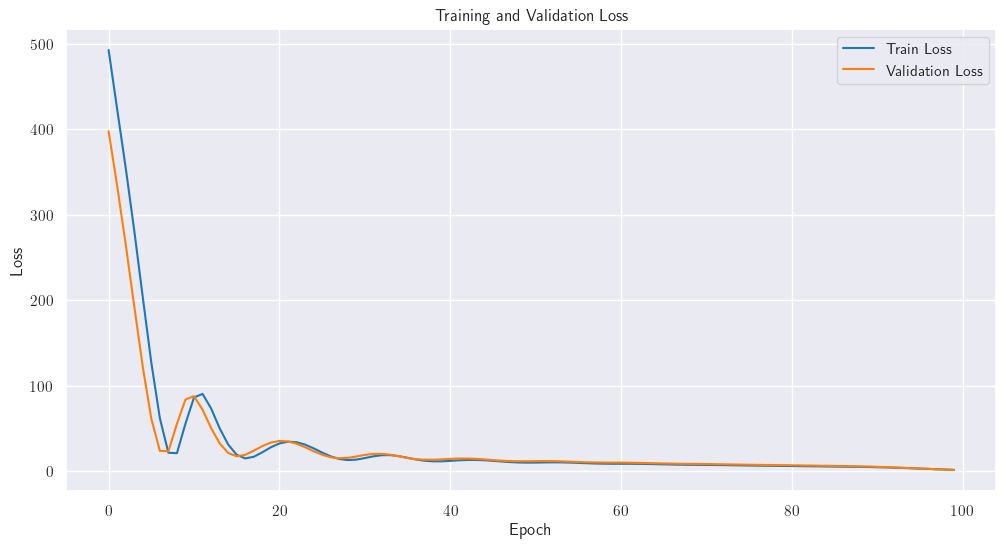

In [90]:
plt.figure(figsize=(12, 6))
plt.plot(train_losses, label='Train Loss')
plt.plot(val_losses, label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.title('Training and Validation Loss')
plt.show()

## Graficar las métricas de validación

#### RMSE

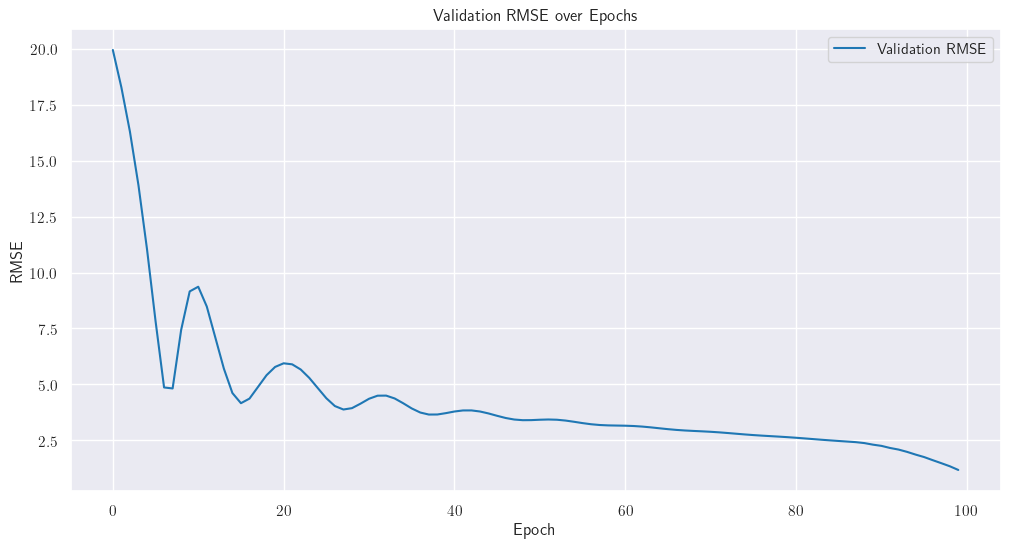

In [91]:
plt.figure(figsize=(12, 6))
plt.plot(val_metrics['rmse'], label='Validation RMSE')
plt.xlabel('Epoch')
plt.ylabel('RMSE')
plt.legend()
plt.title('Validation RMSE over Epochs')
plt.show()

#### MAE

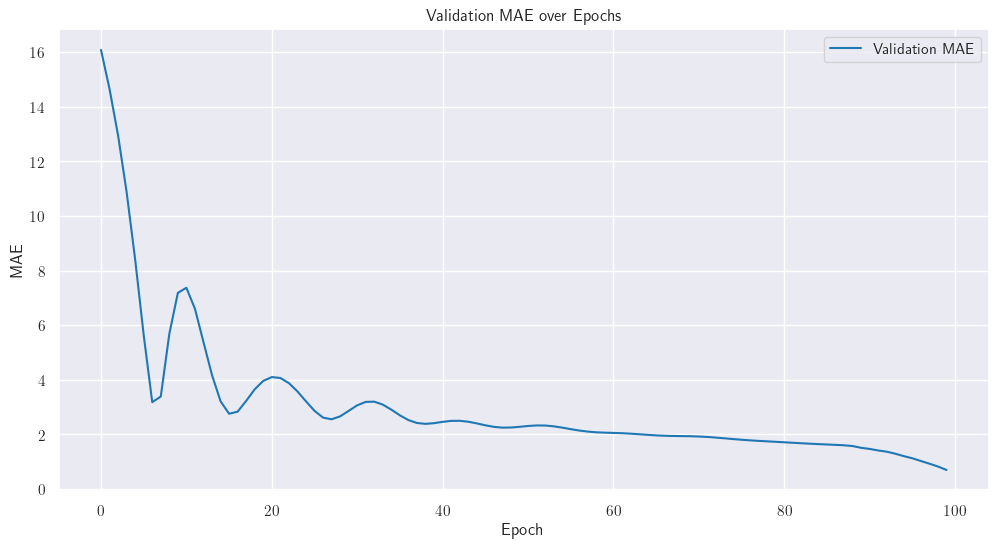

In [92]:
plt.figure(figsize=(12, 6))
plt.plot(val_metrics['mae'], label='Validation MAE')
plt.xlabel('Epoch')
plt.ylabel('MAE')
plt.legend()
plt.title('Validation MAE over Epochs')
plt.show()

#### $R^2$

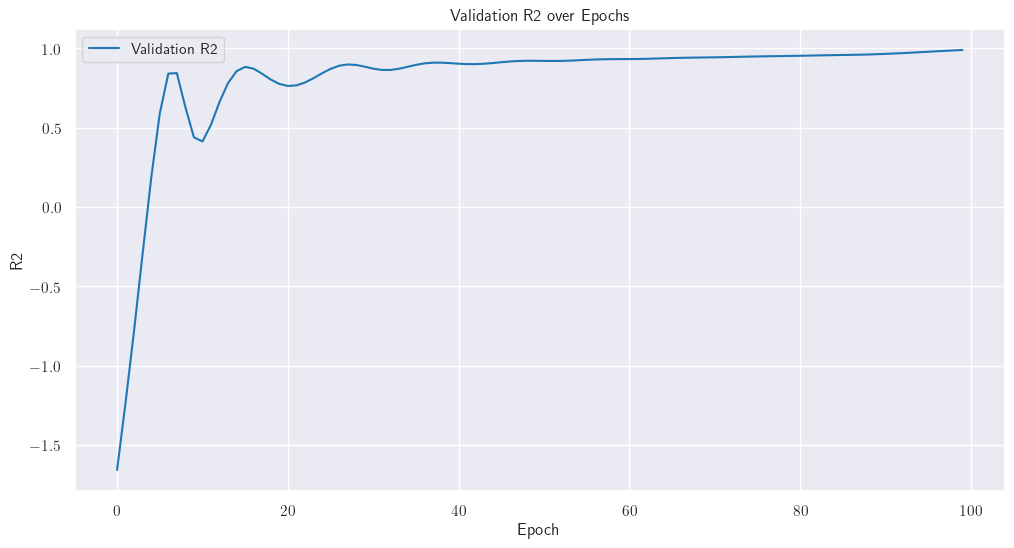

In [94]:
plt.figure(figsize=(12, 6))
plt.plot(val_metrics['r2'], label='Validation R2')
plt.xlabel('Epoch')
plt.ylabel('R2')
plt.legend()
plt.title('Validation R2 over Epochs')
plt.show()

## Obtener las concentraciones y predicciones para la última fecha

In [96]:
# Obtener las concentraciones y predicciones para la última fecha
def get_last_date_data(data, model):
    model.eval()
    with torch.no_grad():
        output = model(data.x, data.edge_index, data.edge_attr)
    
    # Asumiendo que los datos están organizados como (estaciones, fechas, características)
    last_date_idx = -1
    true_last_date = data.y[:, last_date_idx].cpu().numpy()
    pred_last_date = output[:, last_date_idx].cpu().numpy()
    
    return true_last_date, pred_last_date

# Obtener los datos reales y las predicciones
true_last_date, pred_last_date = get_last_date_data(test_data, model)

Introducir los datos en un dataframe

In [112]:
df_last_date = pd.DataFrame(estaciones[['Estación','Latitud', 'Longitud']])
df_last_date['True data'] = true_last_date
df_last_date['Pred data'] = pred_last_date
df_last_date

,Estación,Latitud,Longitud,True data,Pred data
0,Bolivia,4.735806,-74.125889,30.200001,23.303333
1,Bosa,4.605611,-74.204056,16.170000,13.694916
2,Carvajal - Sevillana,4.595833,-74.148500,51.000000,43.591053
3,Centro de Alto Rendimiento,4.658467,-74.083967,12.000000,11.255558
4,Ciudad Bolivar,4.577806,-74.166278,14.900000,13.216228
5,Colina,4.737194,-74.069472,5.100000,4.529638
6,Fontibon,4.678242,-74.143819,27.700001,20.368355
7,Guaymaral,4.783750,-74.044139,6.000000,5.007287
8,Jazmin,4.608500,-74.114944,11.400000,10.564973
9,Kennedy,4.625050,-74.161333,26.000000,23.144920


## Colores del IBOCA

In [132]:
def get_color(value):
    if value <= 50:
        return 'green'  # Bueno
    elif value <= 100:
        return 'yellow'  # Moderado
    elif value <= 150:
        return 'orange'  # Insalubre para grupos sensibles
    elif value <= 200:
        return 'red'  # Insalubre
    elif value <= 300:
        return 'purple'  # Muy insalubre
    else:
        return 'maroon'  # Peligroso

# Configurar mapa

In [140]:
import folium

# Crear un mapa base
def create_map(df, value: str, title):
    # Encuentra el centro del mapa
    center_lat = df['Latitud'].mean()
    center_lon = df['Longitud'].mean()
    
    m = folium.Map(location=[center_lat, center_lon], zoom_start=11)
    
    for i in range(df.shape[0]):
        folium.CircleMarker(
            location=[df['Latitud'][i], df['Longitud'][i]],
            radius=8,
            color=get_color(df[value][i]),
            fill=True,
            fill_color=get_color(df[value][i]),
            fill_opacity=0.6,
            popup=f"Estación {df['Estación'][i]}: {df[value][i]:.2f}"
        ).add_to(m)
    
    folium.Marker(
        location=[center_lat, center_lon],
        icon=folium.DivIcon(html=f"<div style='font-size: 12pt'>{title}</div>")
    ).add_to(m)
    
    legend_html = f'''
    <div style="position: fixed; 
                bottom: 50px; left: 50px; width: 160px; height: 220px; 
                border:2px solid grey; background:white; z-index:9999; font-size:14px;
                ">&nbsp; <b>Rangos IBOCA</b><br>
                &nbsp; <i class="fa fa-square" style="color:green"></i>&nbsp; 0-50<br>
                &nbsp; <i class="fa fa-square" style="color:yellow"></i>&nbsp; 51-100<br>
                &nbsp; <i class="fa fa-square" style="color:orange"></i>&nbsp; 101-150<br>
                &nbsp; <i class="fa fa-square" style="color:red"></i>&nbsp; 151-200<br>
                &nbsp; <i class="fa fa-square" style="color:purple"></i>&nbsp; 201-300<br>
                &nbsp; <i class="fa fa-square" style="color:maroon"></i>&nbsp; >300
                <br>
                <br>
                <b>Gráfico {value}</b>
    </div>
    '''
    m.get_root().html.add_child(folium.Element(legend_html))
    
    return m

In [141]:
#true_map = create_map(df_last_date, 'True data')
#pred_map = create_map(pred_last_date, 'Predicted Values')

create_map(df_last_date, 'True data','True Values')